In [1]:
import csv

import matplotlib.pyplot as plt

from holiday_card.hershey_text import load_font
from holiday_card.renderers import make_inside_of_card, make_outside_of_card, render_envelope, \
    render_gcode
from holiday_card.trees import string_art

In [2]:
plt.rcParams['figure.dpi'] = 300

In [3]:
scripts = load_font("data/scripts.jhf")
futural = load_font("data/futural.jhf")
futuram = load_font("data/futuram.jhf")

In [4]:
x_segments, y_segments = make_outside_of_card(scripts, futural)
with open("outside.gcode", "w") as destination:
    render_gcode(x_segments, y_segments, -16.25, -14.5, destination)


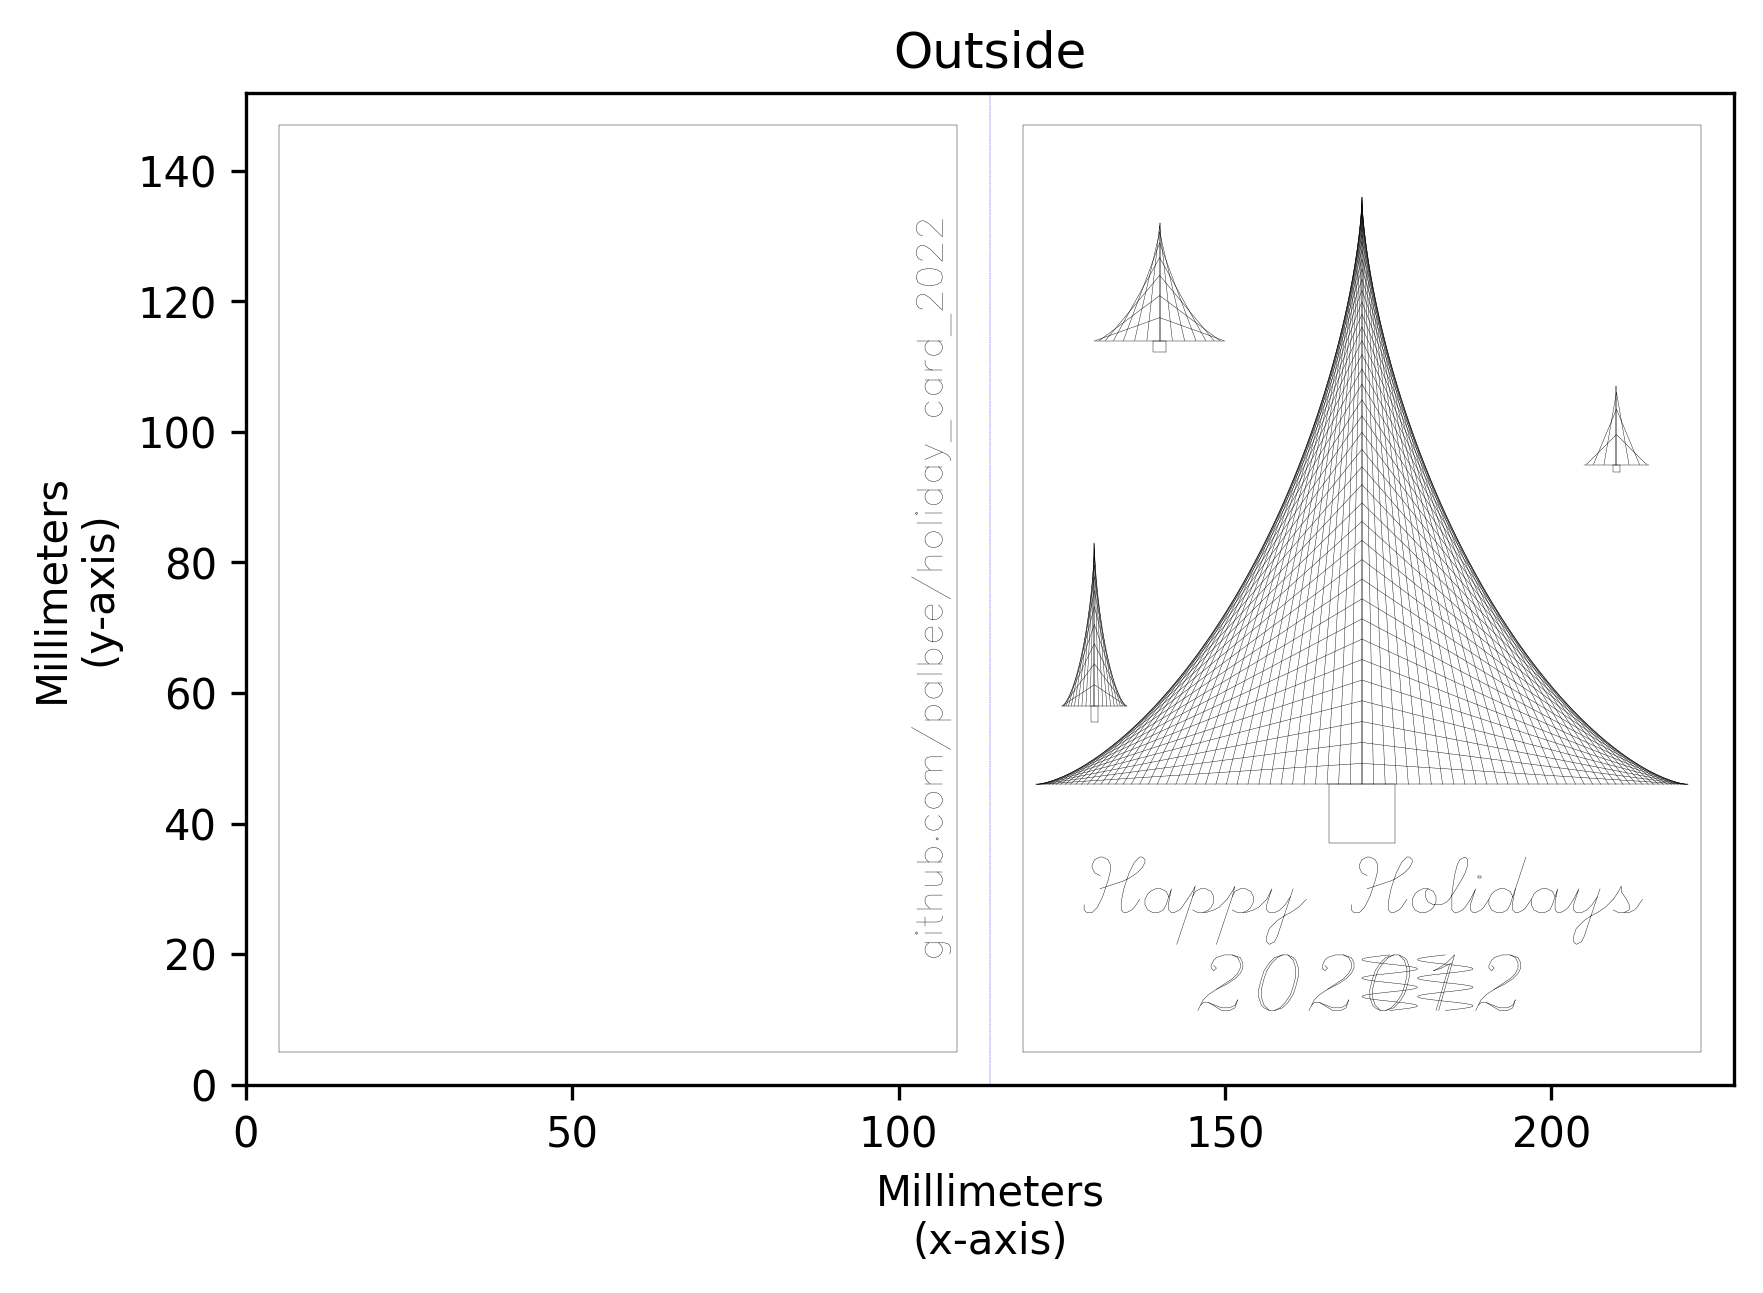

In [5]:
fig, ax = plt.subplots()
for x, y in zip(x_segments, y_segments):
    ax.plot(x, y, lw=0.1, color="black")

ax.set_aspect(1)
ax.set(xlim=(0, 228), ylim=(0, 152))
ax.set_xlabel("Millimeters\n(x-axis)")
ax.set_ylabel("Millimeters\n(y-axis)")
ax.set_title("Outside")
ax.plot([114, 114], [0, 228], lw=0.1, color="blue", ls="dashed")
ax.plot([5, 109, 109, 5, 5], [5, 5, 147, 147, 5], color='black', lw=0.1)
ax.plot([119, 223, 223, 119, 119], [5, 5, 147, 147, 5], color='black', lw=0.1)

plt.show()

In [6]:

x_segments, y_segments = make_inside_of_card(scripts, futuram, "-Us")

with open("inside.gcode", "w") as destination:
    render_gcode(x_segments, y_segments, -16.25, -14.5, destination)


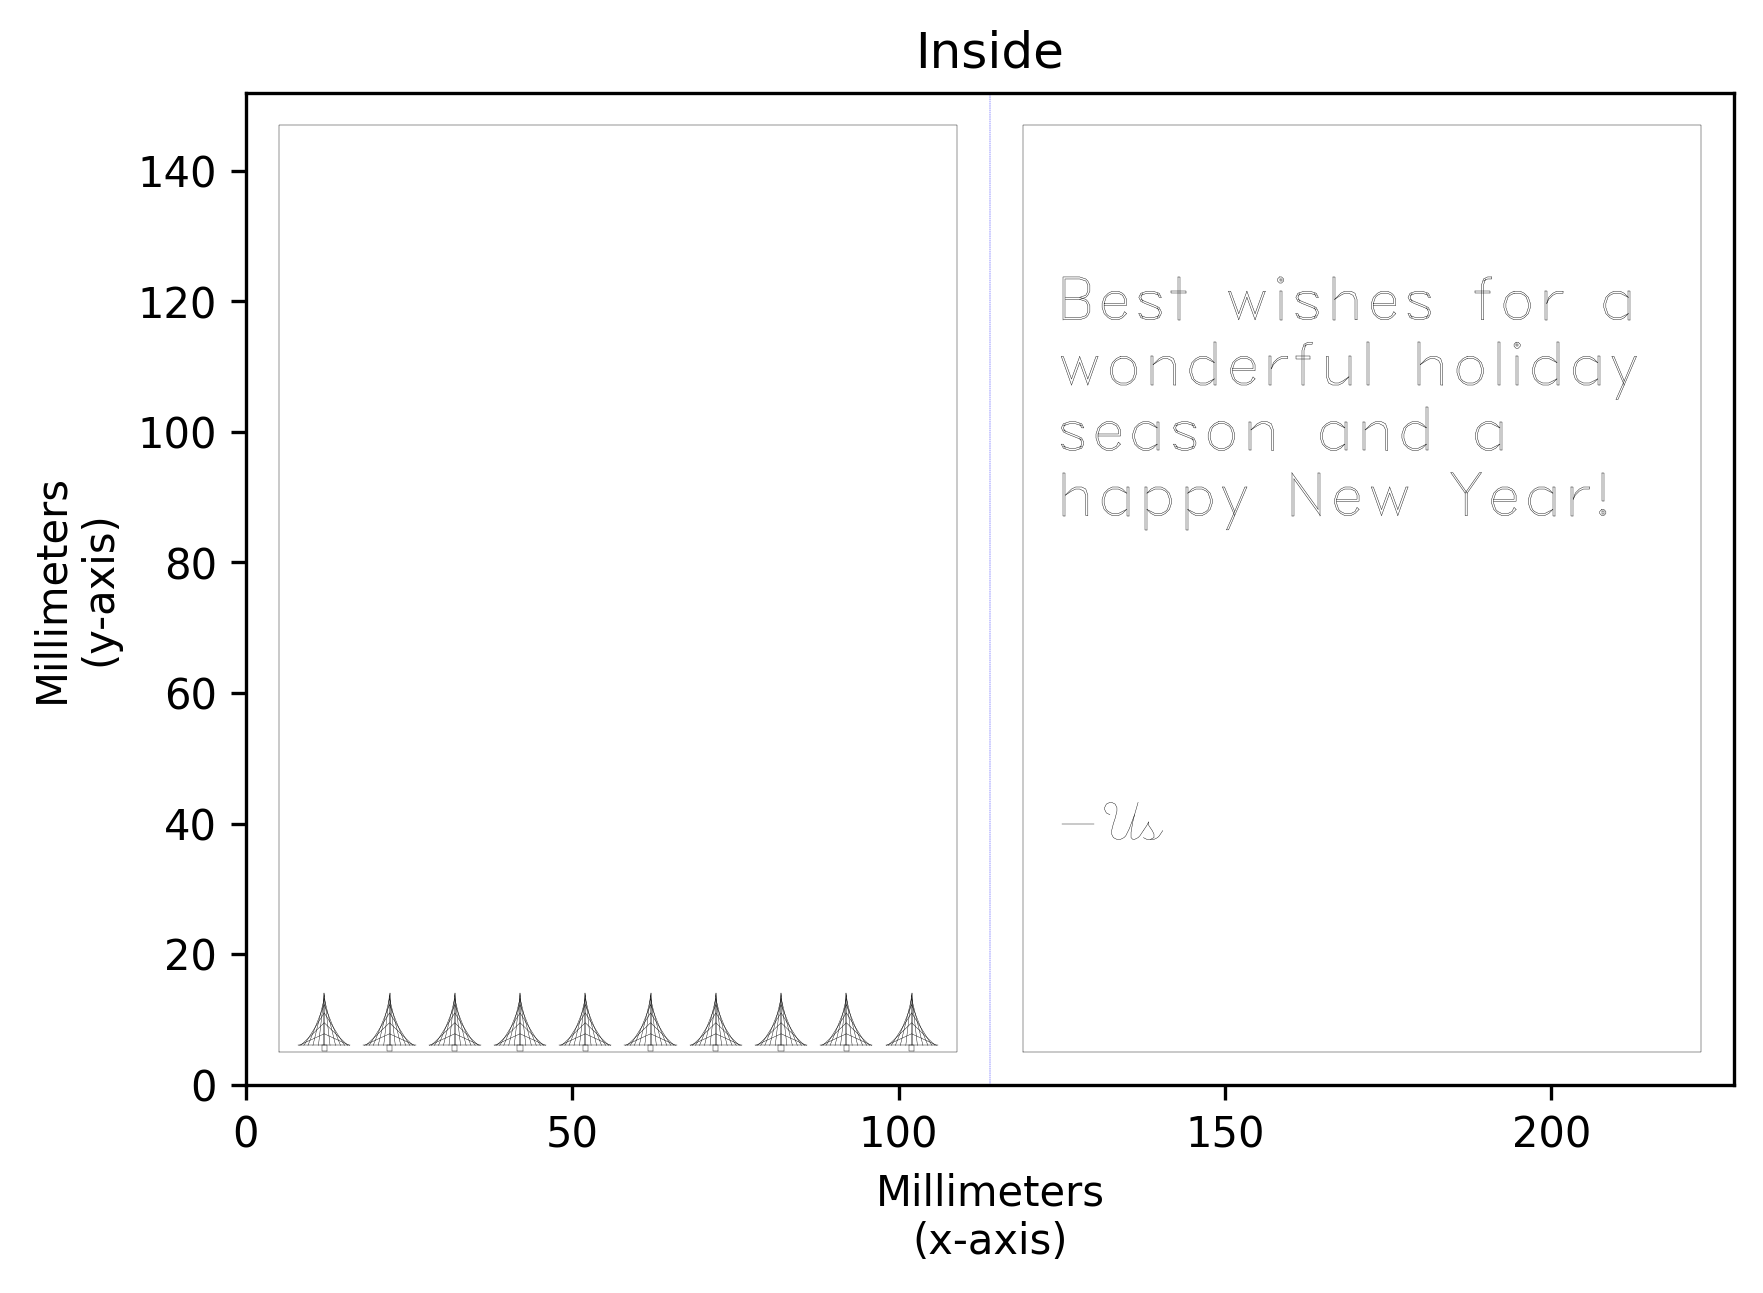

In [7]:
fig, ax = plt.subplots()
for x, y in zip(x_segments, y_segments):
    ax.plot(x, y, lw=0.1, color="black")

ax.set_aspect(1)
ax.set(xlim=(0, 228), ylim=(0, 152))
ax.set_xlabel("Millimeters\n(x-axis)")
ax.set_ylabel("Millimeters\n(y-axis)")
ax.plot([114, 114], [0, 228], lw=0.1, color="blue", ls="dashed")
ax.plot([5, 109, 109, 5, 5], [5, 5, 147, 147, 5], color='black', lw=0.1)
ax.plot([119, 223, 223, 119, 119], [5, 5, 147, 147, 5], color='black', lw=0.1)
ax.set_title("Inside")
plt.show()


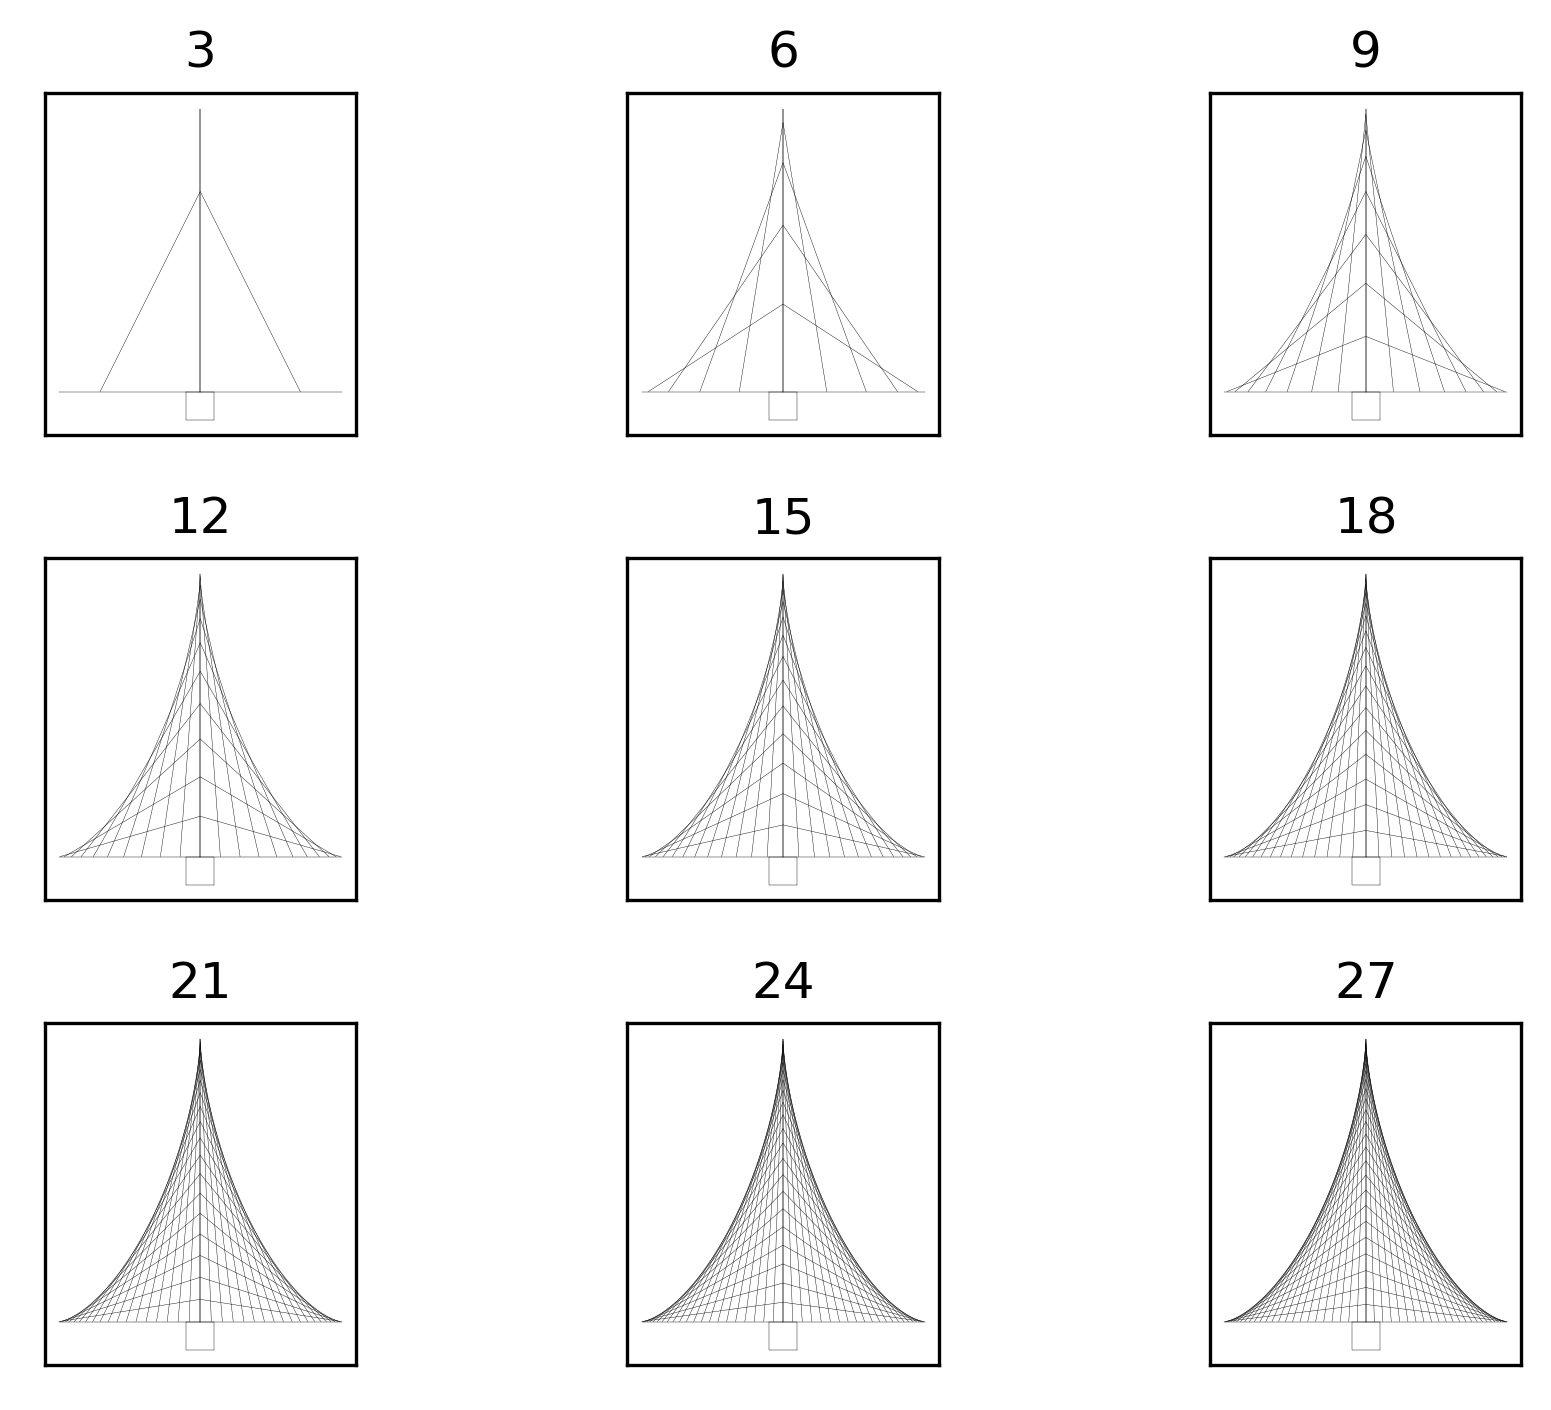

In [8]:
ncols = 3
nrows = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, layout="tight")
for index, n_lines in enumerate(range(ncols * nrows)):
    ax = axs[index // ncols][index % ncols]
    segments_x, segments_y = string_art(n_steps=(n_lines + 1) * 3)
    for x, y in zip(segments_x, segments_y):
        ax.plot(x, y, lw=0.1, color="black")
        ax.set_aspect(1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{(n_lines + 1) * 3}")

plt.show()

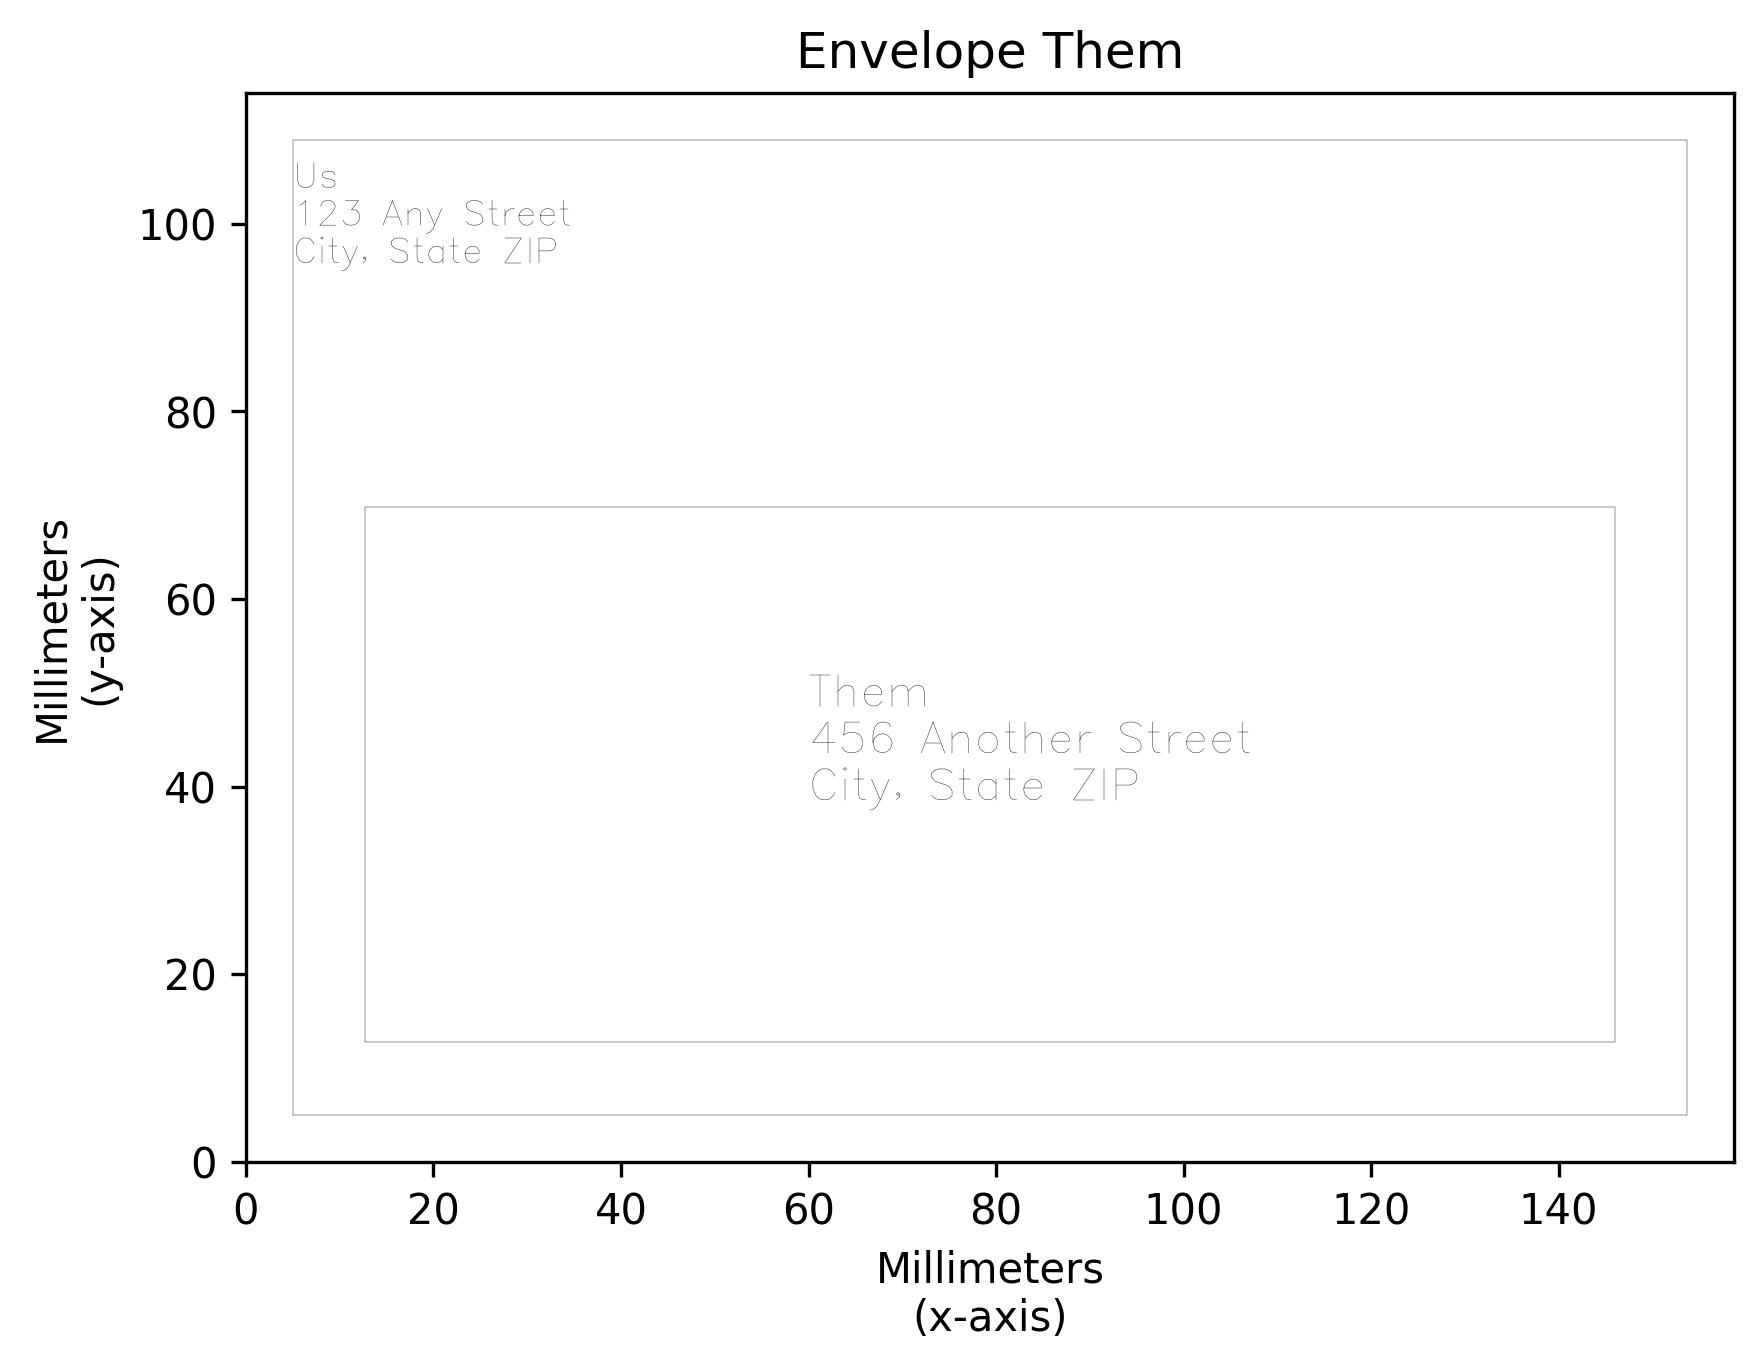

In [9]:

x_segments, y_segments, who = render_envelope(
    ['Us', '123 Any Street', 'City, State ZIP'],
    ['Them', '456 Another Street', 'City, State ZIP'],
    futural
)

fig, ax = plt.subplots()
for x, y in zip(x_segments, y_segments):
    ax.plot(x, y, lw=0.1, color="black")

ax.set_aspect(1)
ax.set(xlim=(0, 158.7), ylim=(0, 114))
ax.set_xlabel("Millimeters\n(x-axis)")
ax.set_ylabel("Millimeters\n(y-axis)")
ax.plot([12.7, 146, 146, 12.7, 12.7], [12.7, 12.7, 69.85, 69.85, 12.7], color='black', lw=0.1)
ax.plot([5, 153.7, 153.7, 5, 5], [5, 5, 109, 109, 5], color='black', lw=0.1)
ax.set_title(f"Envelope {who}")
plt.show()




In [10]:
with open("addresses.csv", 'r', encoding='UTF-8') as infile:
    reader = csv.reader(infile)
    sender = next(reader)
    for recipient in reader:
        x_segments, y_segments, who = render_envelope(sender, recipient, futural)
        with open(f"envelope_{who}.gcode", "w", encoding="utf-8") as destination:
            render_gcode(x_segments, y_segments, -16.25, -14.5, destination)
